In [10]:
repo_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

data_dir = '/Users/iaincarmichael/Documents/courtlistener/data/'

import numpy as np
import sys
import matplotlib.pyplot as plt
import glob

# text processing
from sklearn.metrics.pairwise import cosine_similarity

# graph package
import igraph as ig

# our code
sys.path.append(repo_directory + 'code/')
from setup_data_dir import setup_data_dir, make_subnetwork_directory
from pipeline.download_data import download_bulk_resource, download_master_edgelist, download_scdb
from helpful_functions import case_info

sys.path.append(repo_directory + 'vertex_metrics_experiment/code/')

from bag_of_words import *


# which network to download data for
network_name = 'scotus' # 'federal', 'ca1', etc


# some sub directories that get used
raw_dir = data_dir + 'raw/'
subnet_dir = data_dir + network_name + '/'
text_dir = subnet_dir + 'textfiles/'
nlp_dir = subnet_dir + 'nlp/'


# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
G = ig.Graph.Read_GraphML(subnet_dir + network_name +'_network.graphml')
G.summary()

'IGRAPH DN-- 27885 234312 -- \n+ attr: court (v), id (v), issueArea (v), name (v), year (v)'

In [17]:
from bag_of_words import *
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
tfidf_matrix, op_id_to_bow_id = load_tf_idf(nlp_dir)

In [16]:
tfidf_matrix

<27886x567589 sparse matrix of type '<type 'numpy.float64'>'
	with 20818451 stored elements in Compressed Sparse Row format>

In [39]:
M = 10000
sims = []

indices = np.random.choice(range(tfidf_matrix.shape[0]), size=M, replace=False)
sim_mat = cosine_similarity(tfidf_matrix[indices, :])
for i in range(M):
    for j in range(M):
        if i < j:
            sims.append(sim_mat[i, j])

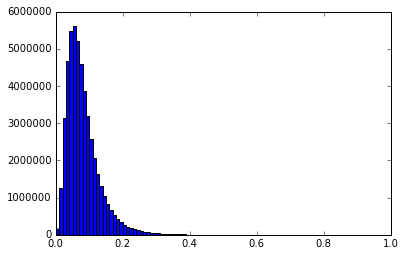

In [54]:
bins = np.linspace(0, 1, 101)
h = plt.hist(sims, bins=bins)

In [60]:
mean = np.mean(sims)

median = np.median(sims)

values = h[0]
mode = bins[np.argmax(values)]

In [61]:
print mean
print median
print mode

0.0802840234965
0.068944256953
0.05
